In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Chargement des fichiers CSV
train_file_path = '/kaggle/input/playground-series-s5e1/train.csv'
test_file_path = '/kaggle/input/playground-series-s5e1/test.csv'
submission_file_path = '/kaggle/input/playground-series-s5e1/sample_submission.csv'

In [4]:
# Lecture des fichiers
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)
sample_submission_df = pd.read_csv(submission_file_path)

In [5]:
# Aperçu des données
print("Aperçu des données d'entraînement:")
print(train_df.head())
print(train_df.info())

Aperçu des données d'entraînement:
   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None


In [6]:
print("\nAperçu des données de test:")
print(test_df.head())
print(test_df.info())


Aperçu des données de test:
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [7]:
# Statistiques descriptives
print("\nStatistiques descriptives des ventes:")
print(train_df['num_sold'].describe())


Statistiques descriptives des ventes:
count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64


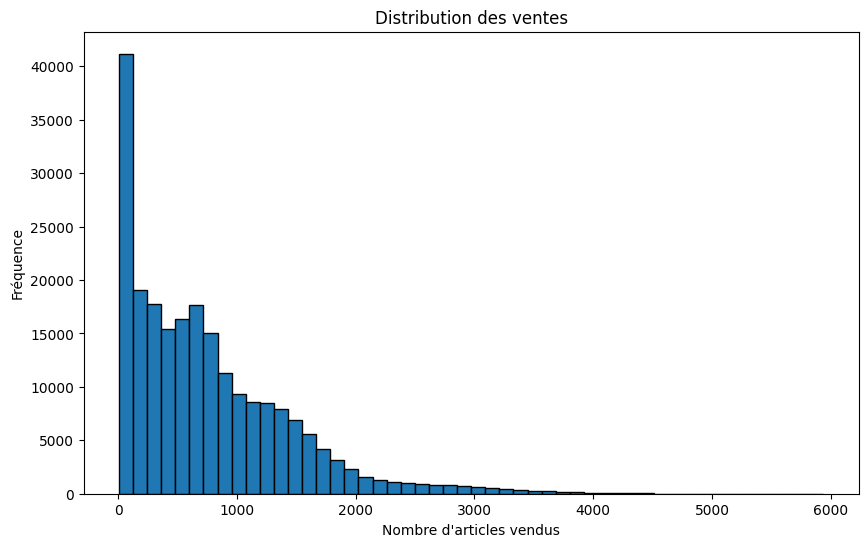

In [8]:
# Visualisations pertinentes
# Distribution des ventes
plt.figure(figsize=(10,6))
plt.hist(train_df['num_sold'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution des ventes')
plt.xlabel('Nombre d\'articles vendus')
plt.ylabel('Fréquence')
plt.show()

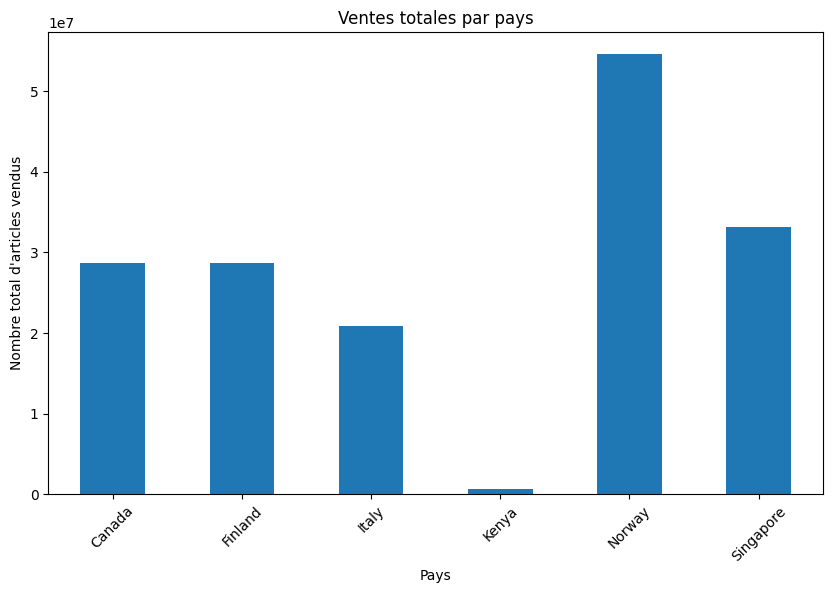

In [9]:
# Ventes totales par pays
plt.figure(figsize=(10,6))
train_df.groupby('country')['num_sold'].sum().plot(kind='bar')
plt.title('Ventes totales par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre total d\'articles vendus')
plt.xticks(rotation=45)
plt.show()

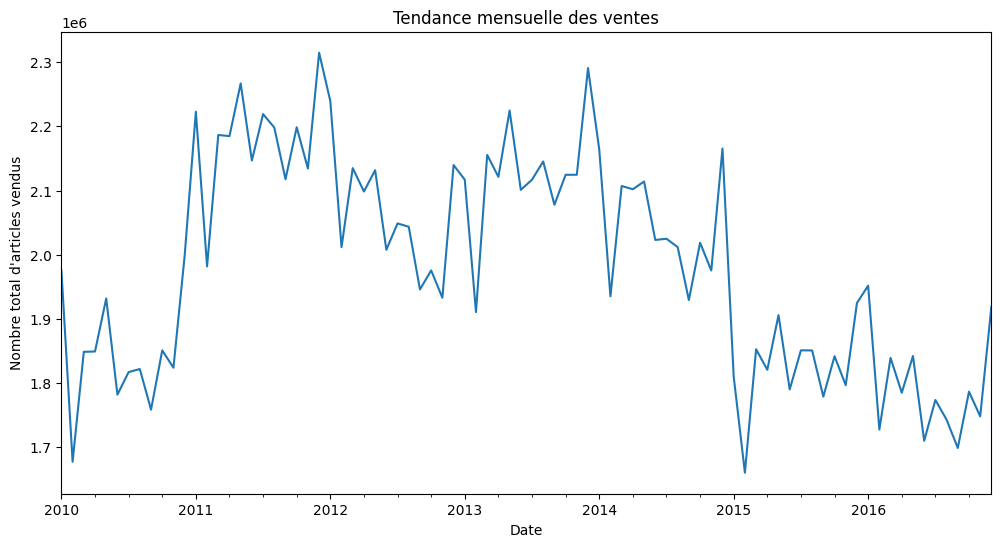

In [10]:
# Tendance des ventes dans le temps
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.set_index('date')['num_sold'].resample('M').sum().plot(figsize=(12,6))
plt.title('Tendance mensuelle des ventes')
plt.xlabel('Date')
plt.ylabel('Nombre total d\'articles vendus')
plt.show()


In [11]:
# Exploration des valeurs manquantes
print("\nValeurs manquantes:")
print(train_df.isnull().sum())


Valeurs manquantes:
id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [12]:
# Traitement des valeurs manquantes (imputation par la médiane)
train_df['num_sold'].fillna(train_df['num_sold'].median(), inplace=True)

In [13]:
# Conversion des dates et extraction de features temporelles
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['day_of_week'] = train_df['date'].dt.dayofweek
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)



In [14]:
# Création de la colonne saison
train_df['season'] = train_df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                            3: 'Spring', 4: 'Spring', 5: 'Spring',
                                            6: 'Summer', 7: 'Summer', 8: 'Summer',
                                            9: 'Fall', 10: 'Fall', 11: 'Fall'})

# Aperçu final des données préparées
print("\nAperçu final des données préparées:")
print(train_df.head())


Aperçu final des données préparées:
   id       date country              store             product  num_sold  \
0   0 2010-01-01  Canada  Discount Stickers   Holographic Goose     605.0   
1   1 2010-01-01  Canada  Discount Stickers              Kaggle     973.0   
2   2 2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0   
3   3 2010-01-01  Canada  Discount Stickers            Kerneler     423.0   
4   4 2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0   

   year  month  day  day_of_week  is_weekend  season  
0  2010      1    1            4           0  Winter  
1  2010      1    1            4           0  Winter  
2  2010      1    1            4           0  Winter  
3  2010      1    1            4           0  Winter  
4  2010      1    1            4           0  Winter  


In [15]:
import seaborn as sns


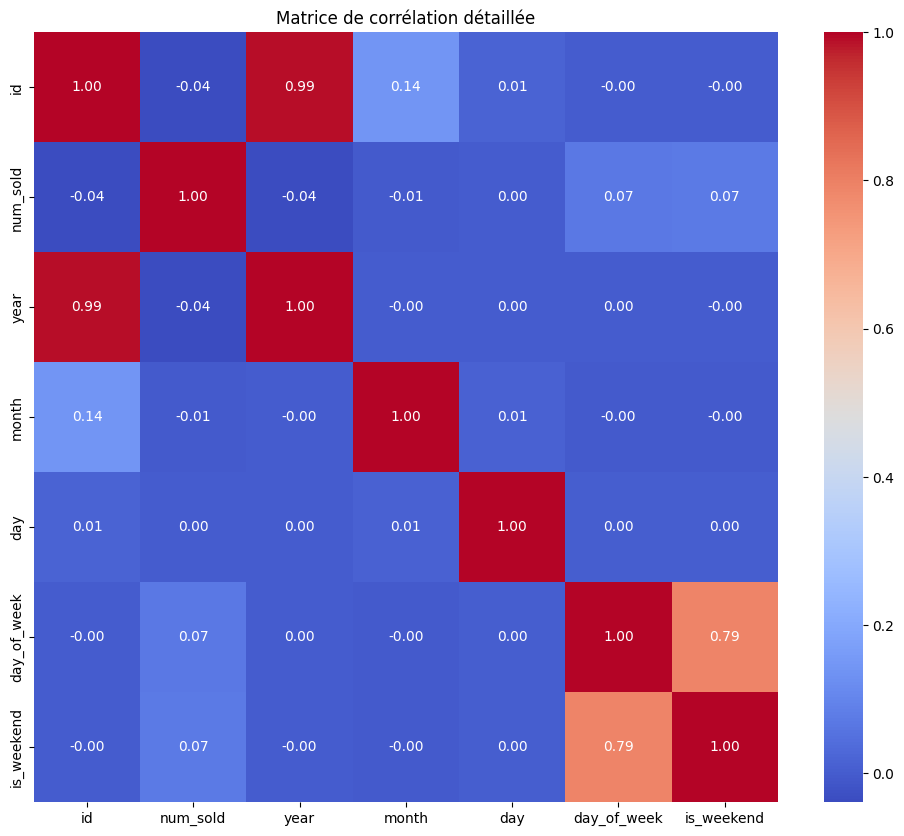

In [16]:
# Corrélation entre variables (corrélation uniquement sur les variables numériques)
plt.figure(figsize=(12,10))
correlation_matrix = train_df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation détaillée')
plt.show()


In [17]:
# Feature Engineering (Ingénierie des Variables)
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [18]:
# Encodage des variables catégorielles
train_df = pd.get_dummies(train_df, columns=['country', 'store', 'product', 'season'], drop_first=True)

In [19]:
# Normalisation des données numériques
scaler = StandardScaler()
numeric_cols = ['num_sold', 'year', 'month', 'day', 'day_of_week', 'is_weekend']
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])



In [20]:
# Aperçu après Feature Engineering
print("\nAperçu après Feature Engineering:")
print(train_df.head())


Aperçu après Feature Engineering:
   id       date  num_sold      year     month       day  day_of_week  \
0   0 2010-01-01 -0.209412 -1.500245 -1.601267 -1.673848     0.499487   
1   1 2010-01-01  0.333900 -1.500245 -1.601267 -1.673848     0.499487   
2   2 2010-01-01  0.234982 -1.500245 -1.601267 -1.673848     0.499487   
3   3 2010-01-01 -0.478116 -1.500245 -1.601267 -1.673848     0.499487   
4   4 2010-01-01 -0.377721 -1.500245 -1.601267 -1.673848     0.499487   

   is_weekend  country_Finland  country_Italy  ...  country_Singapore  \
0   -0.632715            False          False  ...              False   
1   -0.632715            False          False  ...              False   
2   -0.632715            False          False  ...              False   
3   -0.632715            False          False  ...              False   
4   -0.632715            False          False  ...              False   

   store_Premium Sticker Mart  store_Stickers for Less  product_Kaggle  \
0            

In [21]:
# Séparation des Données
from sklearn.model_selection import train_test_split

In [22]:
# Définition des features et de la cible
X = train_df.drop(columns=['num_sold', 'date', 'id'])
y = train_df['num_sold']

In [23]:
# Séparation des données en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Aperçu des formes des ensembles
print("\nTaille de l'ensemble d'entraînement:", X_train.shape)
print("Taille de l'ensemble de validation:", X_val.shape)



Taille de l'ensemble d'entraînement: (184104, 19)
Taille de l'ensemble de validation: (46026, 19)


In [25]:
# Sélection et Entraînement du Modèle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
# Initialisation du modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Prédictions sur l'ensemble de validation
y_pred = model.predict(X_val)


In [29]:
# Évaluation des performances du modèle
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"\nRMSE sur l'ensemble de validation : {rmse:.2f}")



RMSE sur l'ensemble de validation : 0.11


In [30]:
# Test et Entraînement de modèles un par un
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [31]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
rmse_gb = mean_squared_error(y_val, y_pred_gb, squared=False)

print(f"Gradient Boosting RMSE : {rmse_gb:.2f}")

Gradient Boosting RMSE : 0.30


In [32]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
rmse_lr = mean_squared_error(y_val, y_pred_lr, squared=False)

print(f"Linear Regression RMSE : {rmse_lr:.2f}")

Linear Regression RMSE : 0.54


In [34]:
# Sélection du meilleur modèle
models_rmse = {'Random Forest': rmse, 'Gradient Boosting': rmse_gb, 'Linear Regression': rmse_lr}
best_model_name = min(models_rmse, key=models_rmse.get)
best_rmse = models_rmse[best_model_name]

print(f"\nMeilleur modèle : {best_model_name} avec un RMSE de {best_rmse:.2f}")


Meilleur modèle : Random Forest avec un RMSE de 0.11


In [35]:
# Optimisation du modèle Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [36]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [37]:
# Initialisation du modèle
rf_model = RandomForestRegressor(random_state=42)

In [38]:
# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [39]:
# Meilleurs hyperparamètres et modèle
best_rf_model = grid_search.best_estimator_

In [40]:
# Prédictions sur l'ensemble de validation
y_pred_rf_optimized = best_rf_model.predict(X_val)

In [41]:
# Évaluation des performances
rmse_rf_optimized = mean_squared_error(y_val, y_pred_rf_optimized, squared=False)
print(f"Meilleur RMSE Random Forest après optimisation : {rmse_rf_optimized:.2f}")
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

Meilleur RMSE Random Forest après optimisation : 0.11
Meilleurs hyperparamètres : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [43]:
# Prédictions Finales et Génération du fichier de soumission

# Génération des prédictions sur l'ensemble de test
# Vérification et alignement des colonnes pour éviter l'erreur KeyError
test_df['season'] = test_df['date'].apply(lambda x: 'Winter' if int(x.split('-')[1]) in [1, 2, 12]
                                         else 'Spring' if int(x.split('-')[1]) in [3, 4, 5]
                                         else 'Summer' if int(x.split('-')[1]) in [6, 7, 8]
                                         else 'Fall')

test_features = test_df.drop(columns=['date', 'id'])
test_features = pd.get_dummies(test_features, columns=['country', 'store', 'product', 'season'], drop_first=True)
test_features = test_features.reindex(columns=X_train.columns, fill_value=0)

In [44]:
# Prédictions sur l'ensemble de test
test_predictions = best_rf_model.predict(test_features)

# Création du fichier de soumission
submission = pd.DataFrame({
    'id': test_df['id'],
    'num_sold': test_predictions
})


In [46]:

# Sauvegarde du fichier de soumission
submission.to_csv('/kaggle/working/submission.csv', index=False)
print("\nLe fichier de soumission a été généré avec succès !")



Le fichier de soumission a été généré avec succès !
